# Interpreting Linear Regression

We have spent a number of notebooks building our understanding of the statistical technique of linear regression in the context of predictive modeling. Now we will touch on how we can use linear regression to make inferences about our data.

## What we will accomplish

In this notebook we will:
- Discuss how we can use regression to make comparisons,
- Interpret the coefficients of the simple linear regression and
- Mention the differences between interpreting simple and multiple linear regression.

In [1]:
import pandas as pd
import numpy as np
np.random.seed(440)
import matplotlib.pyplot as plt

from seaborn import set_style
set_style("darkgrid")

## Regression is about making comparisons

When it comes to making inferences about the dependent variable, $y$, we can use regression models to compare what we <i>expect</i> for $y$ given a value of $X$. This holds for either simple or multiple linear regression.

### Return to baseball

A nice example of this is our baseball run differential data.

<i>Note: we are NOT doing predictive modeling so we will NOT be making a train test split</i>.

In [2]:
baseball = pd.read_csv("../../../Data/baseball.csv")

Rather than regress on just `R` or `RA` as we did in an earlier notebook, we will regress `W` on `RD`, which stands for <i>run differential</i>. `RD` = `R` - `RA` and is a measure of a teams offensive performance in relation to its defensive performance. A positive `RD` means that a team has scored more runs than it has given up and vice versa.

In [3]:
baseball['RD'] = baseball['R'] - baseball['RA']

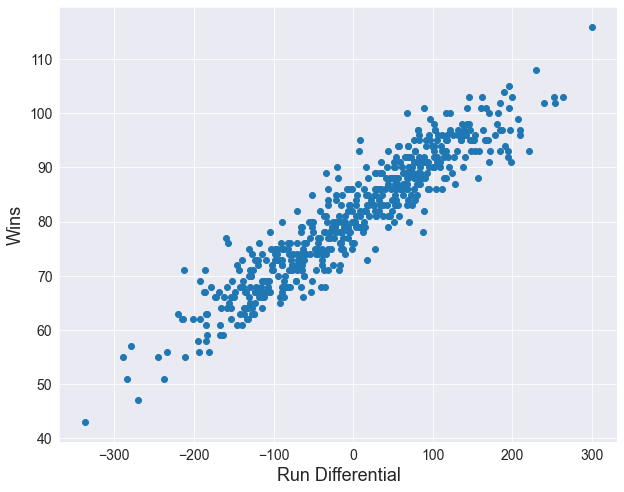

In [4]:
plt.figure(figsize=(10,8))

plt.scatter(baseball.RD, baseball.W)

plt.xlabel("Run Differential", fontsize=18)
plt.ylabel("Wins", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
slr = LinearRegression(copy_X=True)

slr.fit(baseball.RD.values.reshape(-1,1), baseball.W.values)

LinearRegression()

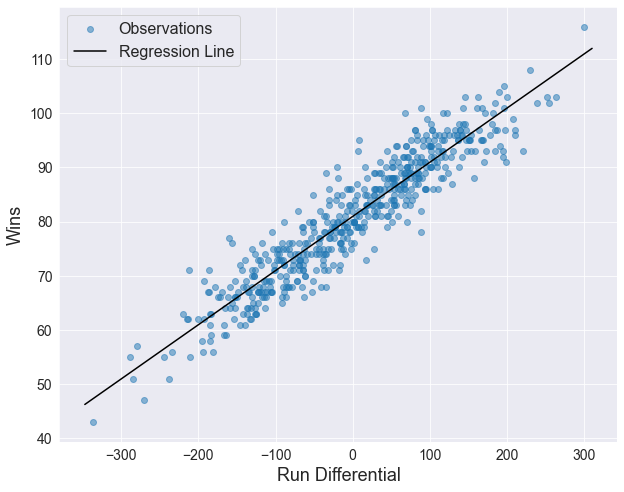

In [7]:
plt.figure(figsize=(10,8))

plt.scatter(baseball.RD, 
            baseball.W, 
            label="Observations",
            alpha=.5)
plt.plot(np.linspace(baseball.RD.min()-10, baseball.RD.max()+10, 100),
            slr.predict(np.linspace(baseball.RD.min()-10, baseball.RD.max()+10, 100).reshape(-1,1)),
            'k-',
            label="Regression Line")

plt.xlabel("Run Differential", fontsize=18)
plt.ylabel("Wins", fontsize=18)

plt.legend(fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

#### The expected value of  $y$ given $X=X^*$

Recall that the regression model regressing $y$ on $X$ is:

$$
y = X\beta + \epsilon, \text{ for } \epsilon \sim N(0,\sigma)
$$

Then for a given value of $X$, $X=X^*$, we have that:

$$
E(y|X=X^*) = E(X^*\beta + \epsilon) = E(X^* \beta) + E(\epsilon) = X^* \beta.
$$

And so a fitted regression model allows you to compare how different values of $X$ impact what we should expect for $y$. 

In [8]:
## for example
print("A team with a 10 run differential should average about",
         np.round(slr.predict(np.array([[10]]))[0]),
         "wins in a season.")

A team with a 10 run differential should average about 82.0 wins in a season.


Sometimes it may be useful to shift your outcome to put it in relation to a value of interest. For example, we may be interested in how a team's win total compares to that of an average team in any given year.

In [9]:
## make wins above average column here
baseball['W_abv_avg'] = baseball['W'] - baseball.W.mean()

In [10]:
## fit new regression model
slr = LinearRegression(copy_X = True)
slr.fit(baseball.RD.values.reshape(-1,1), baseball.W_abv_avg)

LinearRegression()

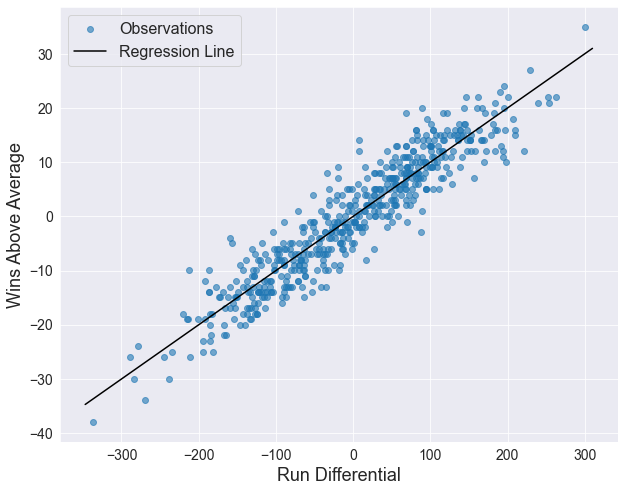

In [11]:
plt.figure(figsize=(10,8))

plt.scatter(baseball.RD, 
            baseball.W_abv_avg, 
            label="Observations",
            alpha=.6)
plt.plot(np.linspace(baseball.RD.min()-10, baseball.RD.max()+10, 100),
            slr.predict(np.linspace(baseball.RD.min()-10, baseball.RD.max()+10, 100).reshape(-1,1)),
            'k-',
            label="Regression Line")

plt.xlabel("Run Differential", fontsize=18)
plt.ylabel("Wins Above Average", fontsize=18)

plt.legend(fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [12]:
## Make a new prediction
print("A team with a 10 run differential should average about",
         np.round(slr.predict(np.array([[10]]))[0]),
         "wins above average.")

A team with a 10 run differential should average about 1.0 wins above average.


### Interpreting $\hat{\beta}$

We can also measure how we expect changes in $X$ to impact $y$ using the coefficients stored in $\hat{\beta}$.

In [14]:
## interpret beta_1_hat here
beta_1_hat = slr.coef_[0]

print("A 1 run increase in RD should average about",
         beta_1_hat*1,"more wins")


print()
print()

print("In order to increase our wins by 1, we should increase our run differential by",
         np.round(1/beta_1_hat))

A 1 run increase in RD should average about 0.1000821857203015 more wins


In order to increase our wins by 1, we should increase our run differential by 10.0


In [15]:
## interpret the intercept here
print("A team with 0 Run Differential should average", np.round(slr.intercept_), "wins above average.")


A team with 0 Run Differential should average -0.0 wins above average.


## Multiple linear regression

In order to demonstrate slight differences with multiple linear regression we will fit the following model:

$$
\texttt{W} = \beta_0 + \beta_1 \texttt{R} + \beta_2 \texttt{RA} + \epsilon.
$$

In [16]:
## Make the model object
reg = LinearRegression(copy_X=True)

## Fit the model
reg.fit(baseball[['R', 'RA']].values, baseball.W.values)

LinearRegression()

Multiple linear regression can be interpreted in much the same way as simple linear regression. The key difference is that we need to be careful about tracking what variables change and what variables remain the same.

For example, let's estimate the effect of increasing a team's runs by $10$ while holding their runs allowed constant. For this let:

$$
X^\& = (\texttt{R}^* + 10, \texttt{RA}^*), \ \text{and} \ X^* = (\texttt{R}^*, \texttt{RA}^*)
$$

then

$$
E(\texttt{W}|X = X^\&) - E(\texttt{W} | X = X^*)
$$

$$
= \beta_0 + \beta_1\left(\texttt{R}^* + 10 \right) + \beta_2 \texttt{RA}^* + \epsilon - \left(\beta_0 + \beta_1 \texttt{R}^* + \beta_2 \texttt{RA}^* + \epsilon\right) = 10 \beta_1.
$$

So if a team increased their runs by $10$ while maintaining their runs allowed we would expect an increase of $10 \beta_1$ wins.

In [17]:
print("A team that increases their runs by 10 while maintaining their runs allowed is",
      "expected to increase their wins by",
      np.round(10*reg.coef_[0], 2),
      "wins.")

A team that increases their runs by 10 while maintaining their runs allowed is expected to increase their wins by 0.97 wins.


The same process can be followed when interpreting changes in categorical features. You just have to keep in mind to change all relevant indicator variables accordingly.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)